In [93]:
import requests
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

In [ ]:
db_host = '******'
db_name = '*******'
db_user = '********'
db_password = '*******'

# Create SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}/{db_name}')

Get the data from the API - Hero Data 

In [94]:
endpoint = 'https://api.opendota.com/api/heroStats'
response = requests.get(endpoint)
if response.status_code == 200:
    hero_data = response.json()
    print(hero_data)
else:
    print('Failed to retrieve hero data:', response.status_code)

herodata_df = pd.DataFrame(hero_data)
table_name = 'hero_details'
herodata_df.to_sql(table_name, engine, index=False, if_exists='replace')

[{'id': 1, 'name': 'npc_dota_hero_antimage', 'primary_attr': 'agi', 'attack_type': 'Melee', 'roles': ['Carry', 'Escape', 'Nuker'], 'img': '/apps/dota2/images/dota_react/heroes/antimage.png?', 'icon': '/apps/dota2/images/dota_react/heroes/icons/antimage.png?', 'base_health': 120, 'base_health_regen': 0.75, 'base_mana': 75, 'base_mana_regen': 0, 'base_armor': 1, 'base_mr': 25, 'base_attack_min': 29, 'base_attack_max': 33, 'base_str': 19, 'base_agi': 24, 'base_int': 12, 'str_gain': 1.6, 'agi_gain': 2.8, 'int_gain': 1.8, 'attack_range': 150, 'projectile_speed': 0, 'attack_rate': 1.4, 'base_attack_time': 100, 'attack_point': 0.3, 'move_speed': 310, 'turn_rate': None, 'cm_enabled': True, 'legs': None, 'day_vision': 1800, 'night_vision': 800, 'localized_name': 'Anti-Mage', '1_pick': 20570, '1_win': 10515, '2_pick': 75840, '2_win': 39553, '3_pick': 123066, '3_win': 64415, '4_pick': 134657, '4_win': 70910, '5_pick': 97452, '5_win': 51278, '6_pick': 53020, '6_win': 27677, '7_pick': 27710, '7_win

Get the data from the API - Pro Players

In [5]:
url = f'https://api.opendota.com/api/proPlayers'
response = requests.get(url)
if response.status_code == 200:
    pro_player_data = response.json()
    print(pro_player_data)
else:
    print('Failed to retrieve player data:', response.status_code)

proplayers_df = pd.DataFrame(pro_player_data)
table_name = 'proplayers_details'
proplayers_df.to_sql(table_name, engine, index=False, if_exists='replace')

[{'account_id': 1296625, 'steamid': '76561197961562353', 'avatar': 'https://avatars.steamstatic.com/f8ddb6ead64a02c93f52e826fc343be414b1df69.jpg', 'avatarmedium': 'https://avatars.steamstatic.com/f8ddb6ead64a02c93f52e826fc343be414b1df69_medium.jpg', 'avatarfull': 'https://avatars.steamstatic.com/f8ddb6ead64a02c93f52e826fc343be414b1df69_full.jpg', 'profileurl': 'https://steamcommunity.com/id/Newsham/', 'personaname': 'Newsham', 'last_login': '2023-10-21T21:51:11.911Z', 'full_history_time': '2024-03-28T12:46:55.612Z', 'cheese': 0, 'fh_unavailable': False, 'loccountrycode': 'US', 'last_match_time': '2024-03-31T02:46:42.000Z', 'plus': True, 'name': 'Newsham', 'country_code': '', 'fantasy_role': 2, 'team_id': 8944221, 'team_name': 'Fart Studios', 'team_tag': 'FRT', 'is_locked': True, 'is_pro': True, 'locked_until': None}, {'account_id': 16497807, 'steamid': '76561197976763535', 'avatar': 'https://avatars.steamstatic.com/a0aca11d96d24ee6796bc8017fe7d988ac69006d.jpg', 'avatarmedium': 'https:/

Extracting specific details from the pro players list 

In [6]:
for player in pro_player_data:
    account_id = player['account_id']
    personaname = player['personaname']
    team_id = player['team_id']
    team_name = player['team_name']
    
    # Print or process the extracted information as needed
    print(f"Account ID: {account_id}, Personaname: {personaname}, Team ID: {team_id}, Team Name: {team_name}")


Account ID: 1296625, Personaname: Newsham, Team ID: 8944221, Team Name: Fart Studios
Account ID: 16497807, Personaname: tOfu, Team ID: 8599101, Team Name: Gaimin Gladiators
Account ID: 18180970, Personaname: skruva den som pabbe, Team ID: 9368468, Team Name: Rest Farmers
Account ID: 27178898, Personaname: 青春期, Team ID: 9280056, Team Name: JustBetter
Account ID: 34505203, Personaname: deathmatch, Team ID: 8291895, Team Name: Tundra Esports
Account ID: 40805086, Personaname: ^_^, Team ID: 36, Team Name: Natus Vincere
Account ID: 41231571, Personaname: Carl, Team ID: 111474, Team Name: Alliance
Account ID: 50580004, Personaname: OK, Team ID: 8390848, Team Name: ITB.Shuffle
Account ID: 54580962, Personaname: insania, Team ID: 2163, Team Name: Team Liquid
Account ID: 56351509, Personaname: enjoyable, Team ID: 8605863, Team Name: Entity
Account ID: 56939869, Personaname: O, Team ID: 8344760, Team Name: Team Bald Reborn
Account ID: 57578110, Personaname: Hope dies last, Team ID: 8616073, Team

In [8]:
df = pd.DataFrame(pro_player_data)

df = df[['account_id', 'personaname', 'team_id', 'team_name']]

print(df)


     account_id           personaname  team_id          team_name
0       1296625               Newsham  8944221       Fart Studios
1      16497807                  tOfu  8599101  Gaimin Gladiators
2      18180970  skruva den som pabbe  9368468       Rest Farmers
3      27178898                   青春期  9280056         JustBetter
4      34505203            deathmatch  8291895     Tundra Esports
..          ...                   ...      ...                ...
401  1615557126              eternyal  2640025        iG.Vitality
402  1657135701        baebutnolonely  8376696           One Move
403  1673586483                     a  8737621      Lava Esports 
404  1675675311                 Atone  8980714         Team Tough
405  1690624451                  None  8538804            Rectify

[406 rows x 4 columns]


In [9]:
df.head()

,account_id,personaname,team_id,team_name
0,1296625,Newsham,8944221,Fart Studios
1,16497807,tOfu,8599101,Gaimin Gladiators
2,18180970,skruva den som pabbe,9368468,Rest Farmers
3,27178898,青春期,9280056,JustBetter
4,34505203,deathmatch,8291895,Tundra Esports


In [10]:
df.to_csv('player_data.csv', index=False)

Getting all the match ids from the leagues

In [11]:
url1 = 'https://api.opendota.com/api/leagues/16483/matches'
response = requests.get(url1)
if response.status_code == 200:
    league_matches = response.json()
    print(league_matches)
else:
    print('Failed to retrieve player data:', response.status_code)

[{'match_id': 7665798853, 'radiant_win': True, 'start_time': 1711988032, 'duration': 1758, 'leagueid': 16483, 'radiant_score': 34, 'dire_score': 8, 'radiant_team_id': 8894818, 'radiant_team_name': None, 'dire_team_id': 9389381, 'dire_team_name': None, 'series_id': 865326, 'series_type': 1}, {'match_id': 7665765599, 'radiant_win': False, 'start_time': 1711987129, 'duration': 2350, 'leagueid': 16483, 'radiant_score': 26, 'dire_score': 33, 'radiant_team_id': 9368468, 'radiant_team_name': None, 'dire_team_id': 8668460, 'dire_team_name': None, 'series_id': 865324, 'series_type': 1}, {'match_id': 7665668685, 'radiant_win': False, 'start_time': 1711983497, 'duration': 2913, 'leagueid': 16483, 'radiant_score': 25, 'dire_score': 41, 'radiant_team_id': 9389381, 'radiant_team_name': None, 'dire_team_id': 8894818, 'dire_team_name': None, 'series_id': 865326, 'series_type': 1}, {'match_id': 7665658383, 'radiant_win': True, 'start_time': 1711983408, 'duration': 2034, 'leagueid': 16483, 'radiant_scor

In [16]:
league_matches_details = pd.DataFrame(league_matches)

In [17]:
league_matches_details

,match_id,radiant_win,start_time,duration,leagueid,radiant_score,dire_score,radiant_team_id,radiant_team_name,dire_team_id,dire_team_name,series_id,series_type
0,7665798853,True,1711988032,1758,16483,34,8,8894818,None,9389381,None,865326,1
1,7665765599,False,1711987129,2350,16483,26,33,9368468,None,8668460,None,865324,1
2,7665668685,False,1711983497,2913,16483,25,41,9389381,None,8894818,None,865326,1
3,7665658383,True,1711983408,2034,16483,38,13,8668460,None,9368468,None,865324,1
4,7665544375,False,1711978865,2407,16483,30,31,7554697,None,8597976,None,865285,1
5,7665555828,False,1711979511,1874,16483,4,30,1838315,None,7732977,None,865295,1
6,7665416449,False,1711974350,3502,16483,36,49,1838315,None,7732977,None,865295,1
7,7665433985,True,1711974327,2885,16483,42,22,8597976,None,7554697,None,865285,1
8,7665354905,True,1711970661,1934,16483,38,3,7554697,None,8597976,None,865285,1
9,7665297524,True,1711967988,4148,16483,32,29,9255706,None,8724984,None,865276,1


In [ ]:
#https://api.opendota.com/api/matches/{match_id}

Using the match ids we collected we are extracting  all the match details from matches

In [25]:
def fetch_match_details(match_id):
    url = f"https://api.opendota.com/api/matches/{match_id}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch details for match_id {match_id}")
        return None

# Iterate over each match_id and fetch match details
match_details_list = []
for match_id in league_matches_details['match_id']:
    match_details = fetch_match_details(match_id)
    if match_details:
        match_details_list.append(match_details)

# Convert the list of match details into a DataFrame
match_details_df = pd.DataFrame(match_details_list)

# Display the DataFrame with match details
print(match_details_df)


    version    match_id                                      draft_timings  \
0        21  7665798853  [{'order': 1, 'pick': False, 'active_team': 3,...   
1        21  7665765599  [{'order': 1, 'pick': False, 'active_team': 3,...   
2        21  7665668685  [{'order': 1, 'pick': False, 'active_team': 3,...   
3        21  7665658383  [{'order': 1, 'pick': False, 'active_team': 3,...   
4        21  7665544375  [{'order': 1, 'pick': False, 'active_team': 3,...   
5        21  7665555828  [{'order': 1, 'pick': False, 'active_team': 3,...   
6        21  7665416449  [{'order': 1, 'pick': False, 'active_team': 3,...   
7        21  7665433985  [{'order': 1, 'pick': False, 'active_team': 3,...   
8        21  7665354905  [{'order': 1, 'pick': False, 'active_team': 3,...   
9        21  7665297524  [{'order': 1, 'pick': False, 'active_team': 3,...   
10       21  7665271072  [{'order': 1, 'pick': False, 'active_team': 3,...   
11       21  7665207861  [{'order': 1, 'pick': False, 'active_te

In [44]:
#match_details_list

In [26]:
match_details_df
#radiant_id and #radiant_name (team name)

,version,match_id,draft_timings,teamfights,objectives,chat,radiant_gold_adv,radiant_xp_adv,cosmetics,players,...,metadata,patch,region,all_word_counts,my_word_counts,throw,loss,replay_url,comeback,stomp
0,21,7665798853,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 80, 'end': 112, 'last_death': 97, '...","[{'time': -30, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'time': -84, 'type': 'chatwheel', 'key': '71...","[-20, -25, 435, -275, -95, -319, -3, 454, 183,...","[0, -62, 562, 93, 296, 573, 897, 719, 1046, 12...","{'647': 4, '4269': 132, '4991': 129, '7451': 1...","[{'player_slot': 0, 'obs_placed': 0, 'sen_plac...",...,None,54,3,"{'pudge': 2, 'gg': 7, 'wp': 1}",{},319.0,16706.0,http://replay271.valve.net/570/7665798853_1346...,NaN,NaN
1,21,7665765599,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 434, 'end': 474, 'last_death': 459,...","[{'time': 81, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...","[{'time': -507, 'type': 'chatwheel', 'key': '7...","[0, 230, -326, -352, 28, -127, -137, 89, 327, ...","[0, 392, 137, -294, 270, 14, -348, -184, 249, ...","{'647': 132, '5441': 132, '6319': 0, '6686': 2...","[{'player_slot': 0, 'obs_placed': 0, 'sen_plac...",...,None,54,3,"{'glhf': 1, 'hfgl': 1, 'hfhf': 1, 'hf': 2, 'gl...",{},NaN,NaN,http://replay273.valve.net/570/7665765599_1609...,4500.0,18749.0
2,21,7665668685,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': -59, 'end': 26, 'last_death': 11, '...","[{'time': -44, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'time': -81, 'type': 'chatwheel', 'key': '10...","[-182, -236, -356, -274, -139, 374, -82, 901, ...","[-32, -71, -151, -247, 394, 351, -294, 181, 37...","{'647': 132, '5470': 131, '6459': 4, '6686': 1...","[{'player_slot': 0, 'obs_placed': 12, 'sen_pla...",...,None,54,3,"{'g': 5, 'lag': 2, 'gg': 4, 'wp': 1}",{},NaN,NaN,http://replay273.valve.net/570/7665668685_2042...,3649.0,14767.0
3,21,7665658383,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 61, 'end': 104, 'last_death': 89, '...","[{'time': 76, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...","[{'time': -693, 'type': 'chatwheel', 'key': '7...","[0, -387, -991, -1053, -1411, -1484, -1159, -1...","[0, 132, -496, -300, -37, -418, -424, -267, 58...","{'630': 130, '647': 4, '4264': 128, '5441': 4,...","[{'player_slot': 0, 'obs_placed': 2, 'sen_plac...",...,None,54,3,"{'pablo': 1, 'can': 2, 'you': 2, 'please': 2, ...",{},1834.0,26512.0,http://replay274.valve.net/570/7665658383_1123...,NaN,NaN
4,21,7665544375,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 364, 'end': 410, 'last_death': 395,...","[{'time': 222, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'time': -655, 'type': 'chat', 'key': 'Matthe...","[0, 283, 350, 294, 657, 428, 328, -97, -754, -...","[0, 227, 66, 131, 173, -27, -431, -636, -834, ...","{'647': 131, '4264': 0, '4412': 129, '4417': 1...","[{'player_slot': 0, 'obs_placed': 0, 'sen_plac...",...,None,54,3,"{'matthew': 1, 'please': 1, 'fix': 1, 'your': ...",{},NaN,NaN,http://replay274.valve.net/570/7665544375_3589...,2268.0,12326.0
5,21,7665555828,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 86, 'end': 124, 'last_death': 109, ...","[{'time': 101, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'time': -551, 'type': 'chat', 'key': 'zrry',...","[0, 9, 375, 453, 763, 310, 23, 10, -282, 8, 11...","[0, -16, 273, 243, 224, 74, 70, -186, -766, -7...","{'647': 131, '5702': 2, '5957': 132, '6428': 1...","[{'player_slot': 0, 'obs_placed': 7, 'sen_plac...",...,None,54,3,"{'zrry': 1, 'misclick': 1, 'haha': 1, 'gg': 3}",{},NaN,NaN,http://replay273.valve.net/570/7665555828_1943...,763.0,26549.0
6,21,7665416449,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 479, 'end': 521, 'last_death': 506,...","[{'time': 118, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'time': -89, 'type': 'chatwheel', 'key': '28...","[0, 58, -434, -117, -488, -470, -879, -146, 98...","[0, 140, -90, 217, 103, 84, 266, 439, 754, 139...","{'647': 129, '4503': 1, '4905': 130, '6662': 0...","[{'player

Function to extract the draft timing data for all the match ids

In [50]:
import pandas as pd

# Assuming timings_data is a list of dictionaries containing the timing information
timings_data = []

# Iterate through draft timings
for timing in draft_timings:
    order = timing['order']
    is_pick = timing['pick']
    active_team = timing['active_team']
    hero_id = timing['hero_id']
    player_slot = timing.get('player_slot', None)
    extra_time = timing['extra_time']
    total_time_taken = timing['total_time_taken']
    
    # Append timing information to the list
    timings_data.append({
        'Match ID': match_id,
        'Order': order,
        'Is Pick': is_pick,
        'Active Team': active_team,
        'Hero ID': hero_id,
        'Player Slot': player_slot,
        'Extra Time': extra_time,
        'Total Time Taken': total_time_taken
    })

# Convert the list of dictionaries into a DataFrame
timings_df = pd.DataFrame(timings_data)

# Print the DataFrame
#print(timings_df)

timings_df.head(50)


,Match ID,Order,Is Pick,Active Team,Hero ID,Player Slot,Extra Time,Total Time Taken
0,7665798853,1,False,3,120,NaN,130,8
1,7665798853,2,False,2,87,NaN,128,22
2,7665798853,3,False,2,23,NaN,130,9
3,7665798853,4,False,3,65,NaN,128,22
4,7665798853,5,False,2,66,NaN,128,19
5,7665798853,6,False,2,15,NaN,128,24
6,7665798853,7,False,3,79,NaN,128,11
7,7665798853,8,True,3,52,6.0,125,3
8,7665798853,9,True,2,86,3.0,128,24
9,7665798853,10,False,3,46,NaN,128,9


Function to extract the all timing data for all the match ids

In [56]:
all_timings_data = []

# Iterate through each row in the DataFrame
for index, row in match_details_df.iterrows():
    match_id = row['match_id']
    draft_timings = row['draft_timings']
    
    # List to store timing data for a single match
    timings_data = []
    
    # Iterate through draft timings for the current match
    for timing in draft_timings:
        order = timing['order']
        is_pick = timing['pick']
        active_team = timing['active_team']
        hero_id = timing['hero_id']
        player_slot = timing.get('player_slot', None)
        extra_time = timing['extra_time']
        total_time_taken = timing['total_time_taken']
        
        # Append timing information to the list
        timings_data.append({
            'Match ID': match_id,
            'Order': order,
            'Is Pick': is_pick,
            'Active Team': active_team,
            'Hero ID': hero_id,
            'Player Slot': player_slot,
            'Extra Time': extra_time,
            'Total Time Taken': total_time_taken
        })
    
    # Extend the list of timing data for all matches
    all_timings_data.extend(timings_data)

# Convert the list of dictionaries into a DataFrame
all_timings_df = pd.DataFrame(all_timings_data)

# Print the DataFrame
#print(all_timings_df)
all_timings_df.head(1000)


,Match ID,Order,Is Pick,Active Team,Hero ID,Player Slot,Extra Time,Total Time Taken
0,7665798853,1,False,3,120,NaN,130,8
1,7665798853,2,False,2,87,NaN,128,22
2,7665798853,3,False,2,23,NaN,130,9
3,7665798853,4,False,3,65,NaN,128,22
4,7665798853,5,False,2,66,NaN,128,19
...,...,...,...,...,...,...,...,...
811,7663645599,20,False,2,22,NaN,22,65
812,7663645599,21,False,2,13,NaN,44,19
813,7663645599,22,False,3,137,NaN,16,57
814,7663645599,23,True,3,120,8.0,22,10


In [57]:
all_timings_df.to_csv('all_draft_timings.csv', index=False)

Extracting the hero details using heroes api

In [59]:
url2 = "https://api.opendota.com/api/heroes"
response = requests.get (url2)
hero = response.json ()
print(hero)
#print(type (hero))
#print(len (hero))
#print([item[ "localized_name"] for item in hero])

[{'id': 1, 'name': 'npc_dota_hero_antimage', 'localized_name': 'Anti-Mage', 'primary_attr': 'agi', 'attack_type': 'Melee', 'roles': ['Carry', 'Escape', 'Nuker'], 'legs': 2}, {'id': 2, 'name': 'npc_dota_hero_axe', 'localized_name': 'Axe', 'primary_attr': 'str', 'attack_type': 'Melee', 'roles': ['Initiator', 'Durable', 'Disabler', 'Carry'], 'legs': 2}, {'id': 3, 'name': 'npc_dota_hero_bane', 'localized_name': 'Bane', 'primary_attr': 'all', 'attack_type': 'Ranged', 'roles': ['Support', 'Disabler', 'Nuker', 'Durable'], 'legs': 4}, {'id': 4, 'name': 'npc_dota_hero_bloodseeker', 'localized_name': 'Bloodseeker', 'primary_attr': 'agi', 'attack_type': 'Melee', 'roles': ['Carry', 'Disabler', 'Nuker', 'Initiator'], 'legs': 2}, {'id': 5, 'name': 'npc_dota_hero_crystal_maiden', 'localized_name': 'Crystal Maiden', 'primary_attr': 'int', 'attack_type': 'Ranged', 'roles': ['Support', 'Disabler', 'Nuker'], 'legs': 2}, {'id': 6, 'name': 'npc_dota_hero_drow_ranger', 'localized_name': 'Drow Ranger', 'prim

In [61]:
hero_data = pd.DataFrame(hero)
hero_data

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Carry]",2
2,3,npc_dota_hero_bane,Bane,all,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker]",2
...,...,...,...,...,...,...,...
119,129,npc_dota_hero_mars,Mars,str,Melee,"[Carry, Initiator, Disabler, Durable]",2
120,135,npc_dota_hero_dawnbreaker,Dawnbreaker,str,Melee,"[Carry, Durable]",2
121,136,npc_dota_hero_marci,Marci,all,Melee,"[Support, Carry, Initiator, Disabler, Escape]",2
122,137,npc_dota_hero_primal_beast,Primal Beast,str,Melee,"[Initiator, Durable, Disabler]",2


In [71]:
hero_details = hero_data[['id','localized_name']]
hero_details

,id,localized_name
0,1,Anti-Mage
1,2,Axe
2,3,Bane
3,4,Bloodseeker
4,5,Crystal Maiden
...,...,...
119,129,Mars
120,135,Dawnbreaker
121,136,Marci
122,137,Primal Beast


In [72]:
merged_df = pd.merge(all_timings_df, hero_details, left_on='Hero ID', right_on='id')

merged_df

,Match ID,Order,Is Pick,Active Team,Hero ID,Player Slot,Extra Time,Total Time Taken,id,localized_name
0,7665798853,1,False,3,120,NaN,130,8,120,Pangolier
1,7665765599,18,True,3,120,5.0,60,59,120,Pangolier
2,7665668685,12,False,2,120,NaN,130,4,120,Pangolier
3,7665555828,18,True,3,120,6.0,67,43,120,Pangolier
4,7665416449,18,True,3,120,5.0,48,30,120,Pangolier
...,...,...,...,...,...,...,...,...,...,...
811,7663950419,19,False,3,59,NaN,57,27,59,Huskar
812,7663803900,22,False,3,59,NaN,16,59,59,Huskar
813,7663645599,19,False,3,59,NaN,56,67,59,Huskar
814,7663917094,13,True,3,20,5.0,120,1,20,Vengeful Spirit


In [73]:
merged_df.head(60)

,Match ID,Order,Is Pick,Active Team,Hero ID,Player Slot,Extra Time,Total Time Taken,id,localized_name
0,7665798853,1,False,3,120,NaN,130,8,120,Pangolier
1,7665765599,18,True,3,120,5.0,60,59,120,Pangolier
2,7665668685,12,False,2,120,NaN,130,4,120,Pangolier
3,7665555828,18,True,3,120,6.0,67,43,120,Pangolier
4,7665416449,18,True,3,120,5.0,48,30,120,Pangolier
5,7665433985,23,True,3,120,6.0,10,16,120,Pangolier
6,7665297524,16,True,3,120,8.0,28,85,120,Pangolier
7,7665271072,21,False,3,120,NaN,11,34,120,Pangolier
8,7665207861,17,True,2,120,4.0,84,5,120,Pangolier
9,7664623259,23,True,3,120,8.0,74,38,120,Pangolier


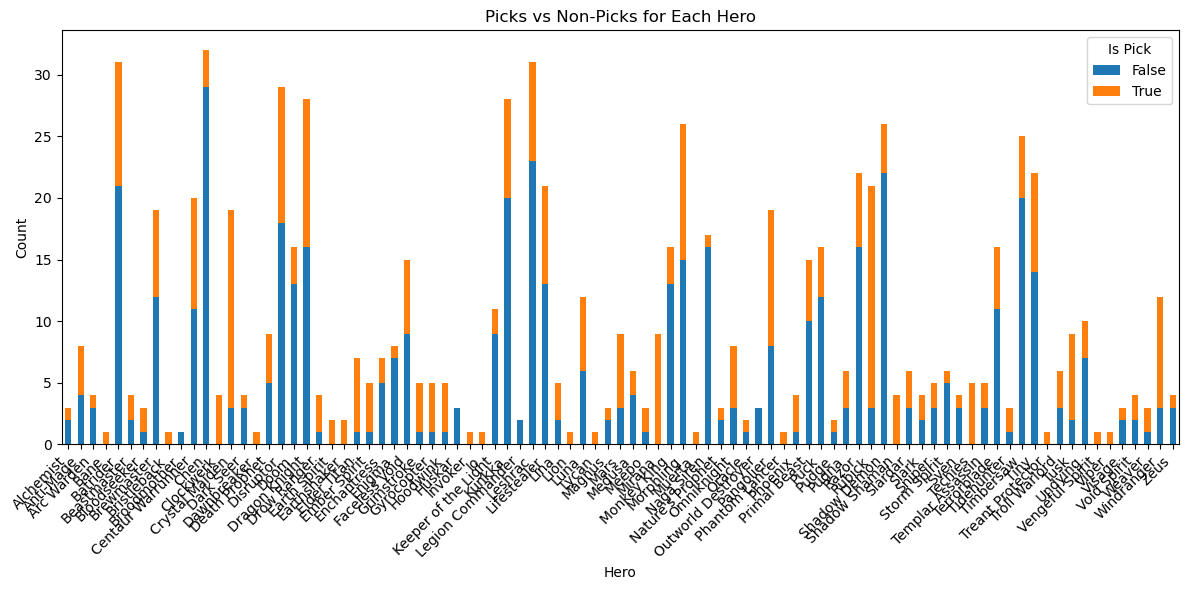

In [74]:
import matplotlib.pyplot as plt


pick_counts = merged_df.groupby(['localized_name', 'Is Pick']).size().unstack(fill_value=0)

# Plot the graph
pick_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Picks vs Non-Picks for Each Hero')
plt.xlabel('Hero')
plt.ylabel('Count')
plt.legend(title='Is Pick')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


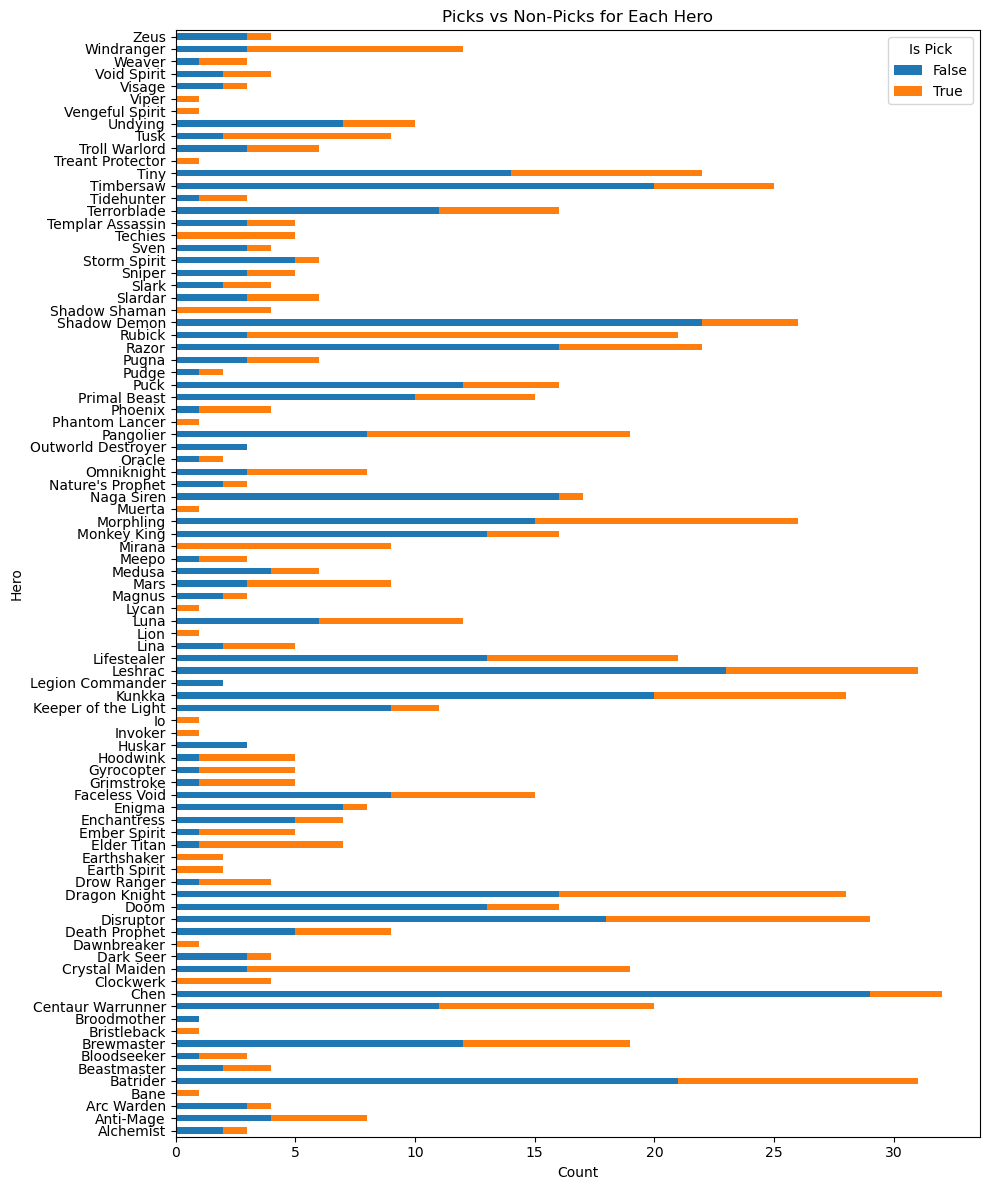

In [75]:
import matplotlib.pyplot as plt

# Group the data by 'localized_name' and 'Is Pick', and then count the occurrences
pick_counts = merged_df.groupby(['localized_name', 'Is Pick']).size().unstack(fill_value=0)

# Plot the graph
pick_counts.plot(kind='barh', stacked=True, figsize=(10, 12))  # Use 'barh' for horizontal bar chart
plt.title('Picks vs Non-Picks for Each Hero')
plt.xlabel('Count')
plt.ylabel('Hero')
plt.legend(title='Is Pick')
plt.tight_layout()
plt.show()


In [78]:
huskar_data = merged_df[merged_df['localized_name'] == 'Huskar']

huskar_data.head()


,Match ID,Order,Is Pick,Active Team,Hero ID,Player Slot,Extra Time,Total Time Taken,id,localized_name
811,7663950419,19,False,3,59,NaN,57,27,59,Huskar
812,7663803900,22,False,3,59,NaN,16,59,59,Huskar
813,7663645599,19,False,3,59,NaN,56,67,59,Huskar


In [79]:
# Filter for rows where 'localized_name' is 'Pangolier'
invoker_data = merged_df[merged_df['localized_name'] == 'Invoker']

invoker_data.head()

,Match ID,Order,Is Pick,Active Team,Hero ID,Player Slot,Extra Time,Total Time Taken,id,localized_name
765,7665271072,24,True,3,74,6.0,74,37,74,Invoker


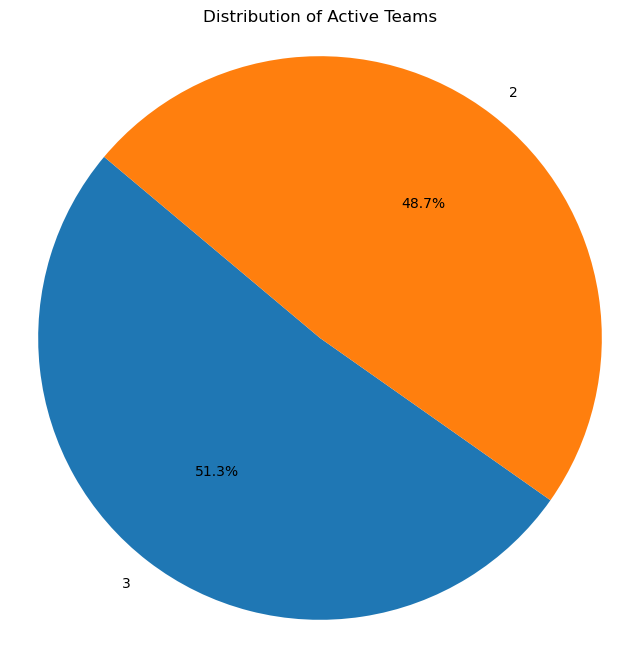

In [82]:
active_teams = merged_df['Active Team'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(active_teams, labels=active_teams.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Active Teams')
plt.axis('equal')
plt.show()